## Import libraires
We import neccessary libraries to explore the data structure and test some features out.

In [1]:
import pandas as pd
import numpy as np
import datetime

## Read sample file
We will read a simple prompt level file and explore prompt level features

In [2]:
sample_df = pd.read_csv('/Users/adityaponnada/Downloads/time_study_data/sample.csv', header=0)

## Get the list of columns in the dataframe
columns = sample_df.columns.tolist()

columns

['Participant_ID',
 'Initial_Prompt_Date',
 'Prompt_Type',
 'Study_Mode',
 'Initial_Prompt_Local_Time',
 'Answer_Status',
 'Actual_Prompt_Local_Time',
 'First_Question_Completion_Unixtime',
 'UTC_Offset',
 'Reprompt_Num',
 'Line',
 'Actual_Prompt_Local_DateTime',
 'DAY_OF_THE_WEEK',
 'TIME_OF_THE_DAY',
 'DAYS_IN_THE_STUDY',
 'BATTERY_LEVEL',
 'CHARGING_STATUS',
 'match_time_battery',
 'LOCATION',
 'match_time_location',
 'DISTANCE_FROM_HOME',
 'LOCATION_LABEL',
 'SCREEN_STATUS',
 'match_time_screen',
 'WAKE_TIME',
 'SLEEP_TIME',
 'PHONE_LOCK',
 'LAST_USAGE_DURATION',
 'match_time_lock',
 'PARTS_OF_WAKING_HOUR',
 'PROXIMITY_TO_WAKE_TIME',
 'PROXIMITY_TO_SLEEP_TIME',
 'mims_summary_1min',
 'num_readings_1min',
 'start_time_1min',
 'mims_summary_2min',
 'num_readings_2min',
 'start_time_2min',
 'mims_summary_3min',
 'num_readings_3min',
 'start_time_3min',
 'mims_summary_4min',
 'num_readings_4min',
 'start_time_4min',
 'mims_summary_5min',
 'num_readings_5min',
 'start_time_5min',
 'mims

Get a preview of the dataframe

In [3]:
# print the first few rows of the dataframe
sample_df.head()

,Participant_ID,Initial_Prompt_Date,Prompt_Type,Study_Mode,Initial_Prompt_Local_Time,Answer_Status,Actual_Prompt_Local_Time,First_Question_Completion_Unixtime,UTC_Offset,Reprompt_Num,...,start_time_7min,mims_summary_8min,num_readings_8min,start_time_8min,mims_summary_9min,num_readings_9min,start_time_9min,mims_summary_10min,num_readings_10min,start_time_10min
0,afflictedrevenueepilepsy@timestudy_com,2021-06-23,EMA_Micro,TIME,Wed Jun 23 06:38:01 EDT 2021,NeverStarted,Wed Jun 23 06:38:01 EDT 2021,-1,GMT-04:00,0,...,2021-06-23 06:31:01.003,5.744718,480,2021-06-23 06:30:01.003,5.744718,540,2021-06-23 06:29:01.003,5.744718,600,2021-06-23 06:28:01.003
1,afflictedrevenueepilepsy@timestudy_com,2021-06-23,EMA_Micro,TIME,Wed Jun 23 06:46:02 EDT 2021,Completed,Wed Jun 23 06:46:02 EDT 2021,1624445168836,GMT-04:00,0,...,2021-06-23 06:39:02.003,30.111526,480,2021-06-23 06:38:02.003,30.111526,540,2021-06-23 06:37:02.003,30.111526,600,2021-06-23 06:36:02.003
2,afflictedrevenueepilepsy@timestudy_com,2021-06-23,CS_EMA_Micro,TIME,Wed Jun 23 06:54:04 EDT 2021,Completed,Wed Jun 23 06:54:04 EDT 2021,1624445652326,GMT-04:00,0,...,2021-06-23 06:47:04.003,4.899119,480,2021-06-23 06:46:04.003,21.054495,540,2021-06-23 06:45:04.003,29.569561,600,2021-06-23 06:44:04.003
3,afflictedrevenueepilepsy@timestudy_com,2021-06-23,EMA_Micro,TIME,Wed Jun 23 07:12:02 EDT 2021,NeverStarted,Wed Jun 23 07:12:02 EDT 2021,-1,GMT-04:00,0,...,2021-06-23 07:05:02.009,1.005139,480,2021-06-23 07:04:02.009,1.005139,540,2021-06-23 07:03:02.009,1.005139,600,2021-06-23 07:02:02.009
4,afflictedrevenueepilepsy@timestudy_com,2021-06-23,Trivia_EMA_Micro,TIME,Wed Jun 23 07:23:02 EDT 2021,NeverStarted,Wed Jun 23 07:23:02 EDT 2021,-1,GMT-04:00,0,...,2021-06-23 07:16:02.009,0.044360,480,2021-06-23 07:15:02.009,0.044360,540,2021-06-23 07:14:02.009,0.044360,600,2021-06-23 07:13:02.009


## Test function
To convet the day of the week into weekend or weekday

In [6]:
## We will convert the day of the week into weekend or weekday. Weekday is 0 and weekend is 1. If the value is <5 then it is a weekday, else it is a weekend.
def convert_day_to_weekend_or_weekday(day):
    if day < 5:
        return 0  # Weekday
    else:
        return 1  # Weekend
    
# Apply the function to the 'day_of_week' column
sample_df['DAY_OF_THE_WEEK'] = sample_df['DAY_OF_THE_WEEK'].apply(convert_day_to_weekend_or_weekday)

## Check the distribution
We will check the distribution of weekday vs. weekend

Weekday count: 64
Weekend count: 0


Matplotlib is building the font cache; this may take a moment.


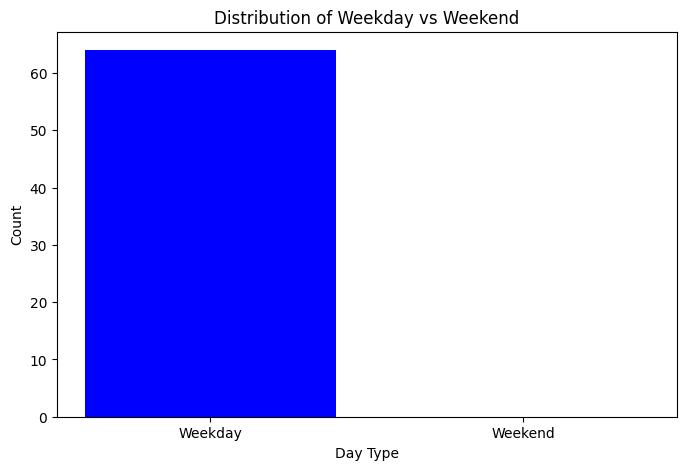

In [8]:
## Check the distribution of weekday vs. weekend in the dataset
weekday_count = sample_df[sample_df['DAY_OF_THE_WEEK'] == 0].shape[0]
weekend_count = sample_df[sample_df['DAY_OF_THE_WEEK'] == 1].shape[0]
print(f"Weekday count: {weekday_count}")
print(f"Weekend count: {weekend_count}")
# Plot the distribution of weekday vs. weekend
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(['Weekday', 'Weekend'], [weekday_count, weekend_count], color=['blue', 'orange'])
plt.title('Distribution of Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.show()